 # Fun with comprehensions !

## List comprehensions

Before we delve into list comprehensions, here is a bit of setup code.

In [1]:
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline

S = randint(low=0, high=11, size=15) # 10 random integers b/w 0 and 10

def f(x):
    """
    Dummy function - returns identity
    """
    return x

Comprehensions are syntactic sugar imported from the functional programming paradigm that are meant to be used to write compact statements. Comprehensions can always be expanded into procedural statements using loops. Although comprehensions have a slight advantage in performance when compared to procedural loops, this doesn not mean that you should always prefer comprehensions over procedural code. Too much syntactic sugar can sometimes make your code unreadable. 

### Common patterns with list comprehensions in single variable

The following sections contain examples of common patterns where list comprehensions are useful. The patterns described here are by no means ehaustive and are only meant to act as a solution template for common problems. One of the most typical uses of a list comprehension in single variable is to expand a mathematical formulation. 

#### Example 1

\begin{align*}
y = f(x) \ \ \forall x \in S
\end{align*}

(8, 8) (2, 2) (5, 5) (3, 3) (6, 6) (0, 0) (2, 2) (3, 3) (2, 2) (6, 6) (2, 2) (3, 3) (1, 1) (4, 4) (8, 8)


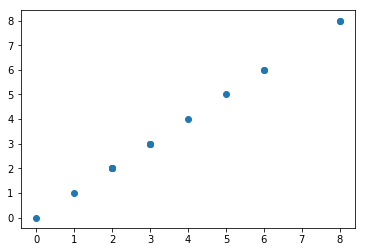

In [2]:
y1 = [f(x) for x in S]
print(*zip(S,y1))
plt.scatter(S, y1)

Such mathematical formulations lend themselves quite well to the use of comprehensions. Procedurally, this code can be broken down into

In [3]:
y2 = []
for x in S:
    y2.append(f(x))
print(*zip(S, y2))
assert y1 == y2
print("Passed!")

(8, 8) (2, 2) (5, 5) (3, 3) (6, 6) (0, 0) (2, 2) (3, 3) (2, 2) (6, 6) (2, 2) (3, 3) (1, 1) (4, 4) (8, 8)
Passed!


#### Example 2

\begin{align*}
y &= \begin{cases}
0 & x \leq 5 \\
f(x) & \text{otherwise}
\end{cases}\\
&\forall x \in S
\end{align*}

(8, 8) (2, 0) (5, 0) (3, 0) (6, 6) (0, 0) (2, 0) (3, 0) (2, 0) (6, 6) (2, 0) (3, 0) (1, 0) (4, 0) (8, 8)


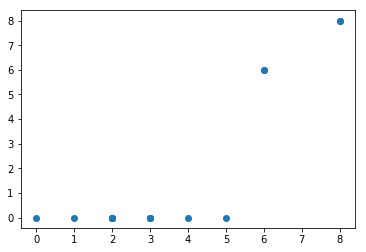

In [4]:
y1 = [0 if x <= 5 else f(x) for x in S]
print(*zip(S,y1))
plt.scatter(S, y1)

**NOTE**:

This is not different from the first pattern in syntactic terms. This is a trick based on the ternary expressions in Python. 

The procedural equivalent of this code is shown below.

In [5]:
y2 = []
for x in S:
    if x <= 5:
        y2.append(0)
    else:
        y2.append(f(x))
print(*zip(S, y2))
assert y1 == y2
print("Passed!")

(8, 8) (2, 0) (5, 0) (3, 0) (6, 6) (0, 0) (2, 0) (3, 0) (2, 0) (6, 6) (2, 0) (3, 0) (1, 0) (4, 0) (8, 8)
Passed!


The two patterns shown in examples 1 and 2 can be generalised to the following pattern.

```python
output_list = [expression(i) for i in some_iterable]

```

#### Example 3

\begin{align*}
y = f(x) \ \forall x \in s \subseteq S
\end{align*}

As the notation indicates, the function exists for only a subset of the input space, namely $s \subseteq S$. The subset can be seen as imposing a condition on the input space.

For the purpose of this example, we will use $s = \{x: x \leq 5, x \in S\}$.

(2, 2) (5, 5) (3, 3) (0, 0) (2, 2) (3, 3) (2, 2) (2, 2) (3, 3) (1, 1) (4, 4)


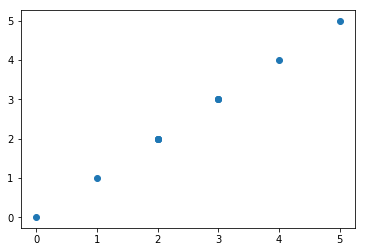

In [6]:
y1 = [f(x) for x in S if x <= 5]
s = [x for x in S if x <= 5]
print(*zip(s,y1))

# Note how the output range has been modified due to the change in input range
plt.scatter(s, y1)

The procedural equivalent of this code is shown below.

In [7]:
y2 = []
for x in S:
    if x <= 5:
        y2.append(f(x))
assert y2 == y1
print(*zip(S, y2))
print("Passed!")

(8, 2) (2, 5) (5, 3) (3, 0) (6, 2) (0, 3) (2, 2) (3, 2) (2, 3) (6, 1) (2, 4)
Passed!


This pattern is syntactically different from the previous pattern. It can be generalized as

```python
output_list = [expression(i) for i in some_iterable if condition(i)]
```

### List comprehensions with two variables
Comprehensions can also be extended to multiple variables. The rules discussed in the previous section also apply to the multivariable comprehensions. The main thing you need to remember for multivariable comprehensions is that the outer variable in the comprehension varies the fastest.

#### Example 4

For example, imagine a matrix 
\begin{align*}
C &= g(i,j) \\
i &\in 0\cdots2,\ j \in 0\cdots2
\end{align*}

We can create the flattened matrix in a single list comprehension using the following code.

In [8]:
import numpy as np

def g(i, j):
    """
    Returns the result of division of indices
    """
    return (i + 1)/ (j + 1)

C1 = [g(i,j) for i in range(0,3) for j in range(0,3)] # replace g with any function that you want

print(C1)
print(np.array(C1).reshape(3,3))

[1.0, 0.5, 0.3333333333333333, 2.0, 1.0, 0.6666666666666666, 3.0, 1.5, 1.0]
[[ 1.          0.5         0.33333333]
 [ 2.          1.          0.66666667]
 [ 3.          1.5         1.        ]]


The procedural equivalent of this code is shown below.

In [9]:
C2 = []
for i in range(3):
    for j in range(3):
        C2.append(g(i, j))
print(C2)
assert C1 == C2
print("Passed!")

[1.0, 0.5, 0.3333333333333333, 2.0, 1.0, 0.6666666666666666, 3.0, 1.5, 1.0]
Passed!


Example 2 also has an equivalent in the two variable case.

#### Example 5

For example,
\begin{align*}
C &= \begin{cases} 
g(i,j) & i \neq j \\
0 & i = j
\end{cases} \\
i &\in 0\cdots2, j \in 0\cdots2
\end{align*}

In [10]:
C1 = [g(i,j) if i !=j else 0 for i in range(0,3) for j in range(0,3)] 

print(C1)
print(np.array(C1).reshape(3,3))

[0, 0.5, 0.3333333333333333, 2.0, 0, 0.6666666666666666, 3.0, 1.5, 0]
[[ 0.          0.5         0.33333333]
 [ 2.          0.          0.66666667]
 [ 3.          1.5         0.        ]]


Technically, this is the same pattern as the previous example but uses the ternary operator (as shown in example 2). The procedural equivalent is shown below.

In [11]:
C2 = []
for i in range(3):
    for j in range(3):
        if i != j:
            C2.append(g(i,j))
        else:
            C2.append(0)
print(C2)
assert C1 == C2
print("Passed!")

[0, 0.5, 0.3333333333333333, 2.0, 0, 0.6666666666666666, 3.0, 1.5, 0]
Passed!


The two examples can be generalized to

```python
output_list = [expr(i,j) for i in iterable1 for j in iterable2] # j varies fastest
```

Restrictions on the input space as shown in example 3 can also extended to the multivariable comprehension. This is illustrated below for the sake of completeness, but the result cannot be displayed as a matrix.

#### Example 6

For example,
\begin{align*}
C &= g(i,j)  \\
i &\in 0\cdots2,\ j \in 0\cdots2,\ i \neq j 
\end{align*}

In [12]:
C1 = [ (i, j, g(i,j)) for i in range(0,3) for j in range(0,3) if i !=j] 
print(C1) # note that the input restriction on the diagonals removes the diagonals from the output list

[(0, 1, 0.5), (0, 2, 0.3333333333333333), (1, 0, 2.0), (1, 2, 0.6666666666666666), (2, 0, 3.0), (2, 1, 1.5)]


The procedural equivalent is shown below.

In [13]:
C2 = []
for i in range(3):
    for j in range(3):
        if i != j:
            C2.append((i, j, g(i,j)))
print(C2)
assert C1 == C2
print("Passed!")

[(0, 1, 0.5), (0, 2, 0.3333333333333333), (1, 0, 2.0), (1, 2, 0.6666666666666666), (2, 0, 3.0), (2, 1, 1.5)]
Passed!


The pattern can be generalized as

```python
output_list = [expr(i,j) for i in iterable1 for j in iterable2 if condition(i,j)]
```

Comprehensions can be used with even more variables but readability takes a serious hit with more than two variables.

See PEP 202 (https://www.python.org/dev/peps/pep-0202/) for more details about list comprehensions. I highly encourage reading PEP documents since you often get the rationale behind a feature in the language straight from the horse's mouth.

## Dictionary comprehensions

See PEP 274 (https://www.python.org/dev/peps/pep-0274/)

You can use dict comprehensions in ways very similar to list comprehensions, except that they produce Python dictionary objects instead of list objects.

Mathematically, dictionary comprehensions are suited to representing functions.

$$
\begin{align*}
    x \rightarrow f(x), x \in S
\end{align*}
$$

can be translated as

In [14]:
dict_comp = {x:f(x) for x in S}
print(dict_comp)

{8: 8, 2: 2, 5: 5, 3: 3, 6: 6, 0: 0, 1: 1, 4: 4}


The patterns discussed in the previous section also apply here. There are mainly two kinds of patterns in the single variable case.

```python
dict_comp1 = {x:expr(x) for x in iterable}
dict_comp2 = {x:expr(x) for x in iterable if condition(x)}
```

## What not to do with comprehensions

1\. Do not use side effects within comprehensions

In [15]:
# Bad code
[print(i) for i in range(3)]

# you know you can do better than that
for i in range(3):
    print(i)
# that's better

0
1
2
0
1
2


2\. Do not sacrifice readability over "speed". For example, do not write code like the snippet shown below

In [16]:
x1 = [i if i <= 10 else i**2 if 10 < i <= 20 else i**4 if 20 < i <= 50 else 1.0 / i for i in range(100) if i not in (5, 7, 11, 13, 17, 19, 29, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97)]

The procedural code is more readable compared to the comprehension

In [17]:
# procedural code is more readable in this case here
x2 = []
for i in range(100):
    # optimus primes are beyond our reach, https://oeis.org/A217090 
    if i not in (5, 7, 11, 13, 17, 19, 29, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97):
        if i <= 10:
            x2.append(i)
        elif 10 < i <= 20:
            x2.append(i**2)
        elif 20 < i <= 50:
            x2.append(i**4)
        else:
            x2.append(1.0 / i)
assert x2 == x1
print("Passed !")

Passed !


This can be shortened to comprehension for readability with a little bit of refactoring.

In [18]:
def function(val):
    if val <= 10:
        return val
    elif 10 < val <= 20:
        return val**2
    elif 20 < val <= 50:
        return val**4
    else:
        return 1.0 / val

def is_optimus_prime(val):
    return val in (5, 7, 11, 13, 17, 19, 29, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97)

x3 = [function(i) for i in range(100) if not is_optimus_prime(i)]
assert x1 == x2 == x3
print("Passed!")

Passed!
